# Integral with Tan and Laplacian


https://dlmf.nist.gov/25.11

https://math.stackexchange.com/questions/364452/evaluate-int-0-frac-pi2-frac11x21-tan-x-mathrm-dx


Worth looking at at some point: https://en.wikipedia.org/wiki/Abel%E2%80%93Plana_formula


In [1]:
from sympy import *

In [2]:
x, y, n, K, k, epsilon, z, s, a, R, N, r, T = symbols('x, y, n, K, k, epsilon, z, s, a, R, N, r, T')
alpha, beta, delta, t, mu, nu, epsilon, theta, phi = symbols('alpha, beta, delta, t, mu, nu, epsilon, theta, phi')

In [5]:
Sum(1/(n+alpha)/(n+beta),(n,0,oo)).doit().expand()

-lerchphi(1, 1, alpha)/(alpha - beta) + lerchphi(1, 1, beta)/(alpha - beta)

## Defining the integral and obtaining a numerical aproximation

In [7]:
integrate(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2)).evalf()

0.597381809451804

In [8]:
Eq(integrate(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2)),
  1/2 * integrate(1/(1+x**2), (x, 0, pi/2)) - 1/4 * Integral((1/(1+(x+pi/4)**2)-1/(1+(x-pi/4)**2))*tan(x), (x, -pi/4, pi/4))
  )

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), -0.25*Integral((1/((x + pi/4)**2 + 1) - 1/((x - pi/4)**2 + 1))*tan(x), (x, -pi/4, pi/4)) + 0.5*atan(pi/2))

## Representing the Laplacian as a Fourier Transform

In [3]:
Eq(1/(1+x**2), Integral(exp(-abs(k))/2*exp(-I*x*k),(k,-oo,oo)))

Eq(1/(x**2 + 1), Integral(exp(-I*k*x)*exp(-Abs(k))/2, (k, -oo, oo)))

## Representing rational function of the tangent as Fourier series (distributional sense)

In [7]:
Eq(1/(1+tan(x)),-I*Sum(I**n*exp(2*I*x*n),(n,1,oo))+(1-I)/2)

Eq(1/(tan(x) + 1), -I*Sum(I**n*exp(2*I*n*x), (n, 1, oo)) + 1/2 - I/2)

In [8]:
Eq(1/(1+tan(x)),-I*Sum(exp(2*I*(x+pi/4)*n),(n,1,oo))+(1-I)/2)

Eq(1/(tan(x) + 1), -I*Sum(exp(2*I*n*(x + pi/4)), (n, 1, oo)) + 1/2 - I/2)

In [14]:
Eq(tan(x), I*(exp(-I*x)-exp(I*x))/(exp(I*x)+exp(-I*x)))

Eq(tan(x), I*(-exp(I*x) + exp(-I*x))/(exp(I*x) + exp(-I*x)))

In [22]:
Eq(tan(x), I-2*I/(1+exp(-2*I*x)))

Eq(tan(x), I - 2*I/(1 + exp(-2*I*x)))

In [25]:
Eq(cot(x), I*(exp(-I*x)+exp(I*x))/(exp(I*x)-exp(-I*x)))

Eq(cot(x), I*(exp(I*x) + exp(-I*x))/(exp(I*x) - exp(-I*x)))

In [30]:
Eq(cot(x), -I+2*I/(1-exp(-2*I*x)))

Eq(cot(x), -I + 2*I/(1 - exp(-2*I*x)))

In [9]:
Sum(x**n,(n,1,oo)).doit()

Piecewise((x/(1 - x), Abs(x) < 1), (Sum(x**n, (n, 1, oo)), True))

## Substituting the Fourier Transform and Fourier Series

In [10]:
Eq(integrate(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2)),
  Integral(Integral(exp(-abs(k))/2*exp(-I*x*k),(k,-oo,oo))*((1-I)/2), (x, 0, pi/2)) + \
  -I*Sum(I**n*Integral(exp(-abs(k))/2*Integral(exp(-I*x*k)*exp(2*I*x*n), (x, 0, pi/2)),(k,-oo,oo)),(n,1,oo))
  )

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), Integral((1/2 - I/2)*Integral(exp(-I*k*x)*exp(-Abs(k))/2, (k, -oo, oo)), (x, 0, pi/2)) - I*Sum(I**n*Integral(exp(-Abs(k))*Integral(exp(-I*k*x)*exp(2*I*n*x), (x, 0, pi/2))/2, (k, -oo, oo)), (n, 1, oo)))

## Evaluate the simpler part

In [11]:
Eq(Integral(Integral(exp(-abs(k))/2*exp(-I*x*k),(k,-oo,oo))*((1-I)/2), (x, 0, pi/2)),
  (1-I)/2*Integral(1/(1+x**2), (x, 0, pi/2)).doit())

Eq(Integral((1/2 - I/2)*Integral(exp(-I*k*x)*exp(-Abs(k))/2, (k, -oo, oo)), (x, 0, pi/2)), (1/2 - I/2)*atan(pi/2))

## Evauate the inner sinc-like integral

In [12]:
Eq(Integral(exp(2*I*x*n)*exp(-I*x*k),(x,0,pi/2)), I*(-1+(-1)**n*exp(-I*pi*k/2))/(k-2*n))

Eq(Integral(exp(-I*k*x)*exp(2*I*n*x), (x, 0, pi/2)), I*((-1)**n*exp(-I*pi*k/2) - 1)/(k - 2*n))

In [33]:
Eq(-I*Sum(I**n*Integral(exp(-abs(k))/2*Integral(exp(-I*x*k)*exp(2*I*x*n), (x, 0, pi/2)),(k,-oo,oo)),(n,1,oo)),
  Sum(I**n*Integral(exp(-abs(k))/2*(-1+(-1)**n*exp(-I*pi*k/2))/(k-2*n),(k,-oo,oo)),(n,1,oo))
  )

Eq(-I*Sum(I**n*Integral(exp(-Abs(k))*Integral(exp(-I*k*x)*exp(2*I*n*x), (x, 0, pi/2))/2, (k, -oo, oo)), (n, 1, oo)), Sum(I**n*Integral(((-1)**n*exp(-I*pi*k/2) - 1)*exp(-Abs(k))/(2*(k - 2*n)), (k, -oo, oo)), (n, 1, oo)))

## Swap summation and integration order

In [39]:
Eq((-1)**n, exp(I*pi*n))

Eq((-1)**n, exp(I*pi*n))

In [23]:
Eq((I)**n, exp(I*pi*n/2))

Eq(I**n, exp(I*pi*n/2))

In [45]:
Eq(Sum(I**n*UnevaluatedExpr(Integral(exp(-2*n*abs(k))/2*(-1+(-1)**n*exp(-I*pi*k*n))/(k-1),(k,-oo,oo))),(n,1,oo)),
   UnevaluatedExpr(Integral((-Sum(I**n*exp(-2*n*abs(k)),(n,1,oo))+
             Sum(I**n*(-1)**n*exp(-I*pi*k*n)*exp(-2*n*abs(k)),(n,1,oo)))/(k-1)/2,(k,-oo,oo))), evaluate=False)

Eq(Sum(I**n*Integral(((-1)**n*exp(-I*pi*k*n) - 1)*exp(-2*n*Abs(k))/(2*(k - 1)), (k, -oo, oo)), (n, 1, oo)), Integral((-Sum(I**n*exp(-2*n*Abs(k)), (n, 1, oo)) + Sum((-1)**n*I**n*exp(-2*n*Abs(k))*exp(-I*pi*k*n), (n, 1, oo)))/(2*(k - 1)), (k, -oo, oo)))

In [8]:
Integral(exp(-2*n*k),(k,0,oo)).doit()

Piecewise((1/(2*n), Abs(arg(n)) < pi/2), (Integral(exp(-2*k*n), (k, 0, oo)), True))

## Evaluate integrands as geometric sums

In [41]:
Eq(UnevaluatedExpr(Sum(x**n, (n,1,oo))), Sum(x**n, (n,1,oo)).doit())

Eq(Sum(x**n, (n, 1, oo)), Piecewise((x/(1 - x), Abs(x) < 1), (Sum(x**n, (n, 1, oo)), True)))

In [46]:
Eq(UnevaluatedExpr(Sum(I**n*exp(-2*n*abs(k)),(n,1,oo))),
  I*exp(-2*abs(k))/(1-I*exp(-2*abs(k)))
  )

Eq(Sum(I**n*exp(-2*n*Abs(k)), (n, 1, oo)), I*exp(-2*Abs(k))/(1 - I*exp(-2*Abs(k))))

In [48]:
Eq(I*exp(-2*abs(k))/(1-I*exp(-2*abs(k))), 1/(-I*exp(2*abs(k))-1))

Eq(I*exp(-2*Abs(k))/(1 - I*exp(-2*Abs(k))), 1/(-I*exp(2*Abs(k)) - 1))

In [47]:
Eq(UnevaluatedExpr(Sum(I**n*(-1)**n*exp(-I*pi*k*n)*exp(-2*n*abs(k)),(n,1,oo))),
  -I*exp(-I*pi*k)*exp(-2*abs(k))/(1-(-I*exp(-I*pi*k)*exp(-2*abs(k))))
  )

Eq(Sum((-1)**n*I**n*exp(-2*n*Abs(k))*exp(-I*pi*k*n), (n, 1, oo)), -I*exp(-I*pi*k)*exp(-2*Abs(k))/(1 + I*exp(-I*pi*k)*exp(-2*Abs(k))))

In [49]:
Eq(-I*exp(-I*pi*k)*exp(-2*abs(k))/(1-(-I*exp(-I*pi*k)*exp(-2*abs(k)))),
   -1/(-I*exp(I*pi*k)*exp(2*abs(k))+1)
  )

Eq(-I*exp(-I*pi*k)*exp(-2*Abs(k))/(1 + I*exp(-I*pi*k)*exp(-2*Abs(k))), -1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1))

In [12]:
Integral(exp(I*s*(t-1))*exp(-t),(t,0,oo)).doit()

Piecewise((exp(-I*s)/(-I*s + 1), Abs(arg(s) - pi/2) <= pi/2), (Integral(exp(-t)*exp(I*s*(t - 1)), (t, 0, oo)), True))

In [11]:
Integral(exp(I*s*(t-1)),s).doit()

-I*exp(-I*s)*exp(I*s*t)/(t - 1)

In [52]:
Eq(UnevaluatedExpr(Integral((-Sum(I**n*exp(-2*n*abs(k)),(n,1,oo))+
             Sum(I**n*(-1)**n*exp(-I*pi*k*n)*exp(-2*n*abs(k)),(n,1,oo)))/(k-1)/2,(k,-oo,oo))),
   -UnevaluatedExpr(Integral((1/(-I*exp(2*abs(k))-1)+
             1/(-I*exp(I*pi*k)*exp(2*abs(k))+1))/(k-1)/2,(k,-oo,oo))), evaluate=False)

Eq(Integral((-Sum(I**n*exp(-2*n*Abs(k)), (n, 1, oo)) + Sum((-1)**n*I**n*exp(-2*n*Abs(k))*exp(-I*pi*k*n), (n, 1, oo)))/(2*(k - 1)), (k, -oo, oo)), -Integral((1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1) + 1/(-I*exp(2*Abs(k)) - 1))/(2*(k - 1)), (k, -oo, oo)))

## Infinite integral form

In [9]:
result_1 = Eq(UnevaluatedExpr(Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))),
   (1-I)/2*atan(pi/2) - UnevaluatedExpr(Integral((1/(-I*exp(2*abs(k))-1)+
    1/(-I*exp(I*pi*k)*exp(2*abs(k))+1))/(k-1)/2,(k,-oo,oo))), evaluate=False
  )
result_1

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), (1/2 - I/2)*atan(pi/2) - Integral((1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1) + 1/(-I*exp(2*Abs(k)) - 1))/(2*(k - 1)), (k, -oo, oo)))

### Numerical evaluation check

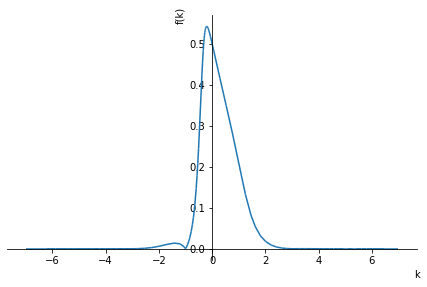

In [66]:
plot(abs((1/(-I*exp(2*abs(k))-1)+
    1/(-I*exp(I*pi*k)*exp(2*abs(k))+1))/(k-1)/2),(k,-7,7))

In [65]:
((1-I)/2*atan(pi/2).evalf(10) - 
Integral((1/(-I*exp(2*abs(k))-1)+1/(-I*exp(I*pi*k)*exp(2*abs(k))+1))/(k-1)/2,(k,-7,7)).evalf(10))

0.5973817705 + 1.382431947e-10*I

In [59]:
0.597381809451804

0.597381809451804

## Real and imaginary parts of infinite integral form

In [96]:
Eq(1/(-I*exp(I*pi*k)*exp(2*abs(k))+1),
((I*exp(-I*pi*k)*exp(2*abs(k))+1))/((-I*exp(I*pi*k)*exp(2*abs(k))+1) * (I*exp(-I*pi*k)*exp(2*abs(k))+1)).expand()
)

Eq(1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1), (1 + I*exp(-I*pi*k)*exp(2*Abs(k)))/(-I*exp(I*pi*k)*exp(2*Abs(k)) + exp(4*Abs(k)) + 1 + I*exp(-I*pi*k)*exp(2*Abs(k))))

In [139]:
Eq(1/(-I*exp(I*pi*k)*exp(2*abs(k))+1),
((sin(pi*k)*exp(2*abs(k))+1))/(1+2*sin(pi*k)*exp(2*abs(k))+exp(4*abs(k))) + 
   ((I*(cos(pi*k))*exp(2*abs(k))))/(1+2*sin(pi*k)*exp(2*abs(k))+exp(4*abs(k)))
)

Eq(1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1), (exp(2*Abs(k))*sin(pi*k) + 1)/(exp(4*Abs(k)) + 2*exp(2*Abs(k))*sin(pi*k) + 1) + I*exp(2*Abs(k))*cos(pi*k)/(exp(4*Abs(k)) + 2*exp(2*Abs(k))*sin(pi*k) + 1))

In [145]:
(-1/(-I*exp(I*pi*k)*exp(2*abs(k))+1) +
(sin(pi*k)+exp(-2*abs(k)))/(2*cosh(2*k)+2*sin(pi*k)) + I*cos(pi*k)/(2*cosh(2*k)+2*sin(pi*k))).subs(k,-0.3875).evalf(10)

-1.49078618e-16 + 1.244749022e-16*I

In [146]:
Eq(1/(-I*exp(I*pi*k)*exp(2*abs(k))+1),
(sin(pi*k)+exp(-2*abs(k)))/(2*cosh(2*k)+2*sin(pi*k)) + I*cos(pi*k)/(2*cosh(2*k)+2*sin(pi*k))
)

Eq(1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1), (sin(pi*k) + exp(-2*Abs(k)))/(2*sin(pi*k) + 2*cosh(2*k)) + I*cos(pi*k)/(2*sin(pi*k) + 2*cosh(2*k)))

In [147]:
Eq(1/(-I*exp(2*abs(k))-1),I/(2*cosh(2*k)) - exp(-2*abs(k))/(2*cosh(2*k)))

Eq(1/(-I*exp(2*Abs(k)) - 1), I/(2*cosh(2*k)) - exp(-2*Abs(k))/(2*cosh(2*k)))

In [148]:
Eq(UnevaluatedExpr(Integral((1/(-I*exp(2*abs(k))-1) + 1/(-I*exp(I*pi*k)*exp(2*abs(k))+1))/(k-1)/2,(k,-oo,oo))),
UnevaluatedExpr(Integral((I/(2*cosh(2*k)) - exp(-2*abs(k))/(2*cosh(2*k)) +
(sin(pi*k)+exp(-2*abs(k)))/(2*cosh(2*k)+2*sin(pi*k)) + I*cos(pi*k)/(2*cosh(2*k)+2*sin(pi*k)))/(k-1)/2,(k,-oo,oo))),
evaluate=False)

Eq(Integral((1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1) + 1/(-I*exp(2*Abs(k)) - 1))/(2*(k - 1)), (k, -oo, oo)), Integral(((sin(pi*k) + exp(-2*Abs(k)))/(2*sin(pi*k) + 2*cosh(2*k)) + I/(2*cosh(2*k)) - exp(-2*Abs(k))/(2*cosh(2*k)) + I*cos(pi*k)/(2*sin(pi*k) + 2*cosh(2*k)))/(2*(k - 1)), (k, -oo, oo)))

In [149]:
Eq(UnevaluatedExpr(Integral((1/(-I*exp(2*abs(k))-1) + 1/(-I*exp(I*pi*k)*exp(2*abs(k))+1))/(k-1)/2,(k,-oo,oo))),
UnevaluatedExpr(Integral(( - exp(-2*abs(k))/(cosh(2*k)) +
(sin(pi*k)+exp(-2*abs(k)))/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-oo,oo))) +
I*UnevaluatedExpr(Integral((1/(cosh(2*k)) +
cos(pi*k)/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-oo,oo))),
evaluate=False)

Eq(Integral((1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1) + 1/(-I*exp(2*Abs(k)) - 1))/(2*(k - 1)), (k, -oo, oo)), Integral(((sin(pi*k) + exp(-2*Abs(k)))/(sin(pi*k) + cosh(2*k)) - exp(-2*Abs(k))/cosh(2*k))/(4*(k - 1)), (k, -oo, oo)) + I*Integral((1/cosh(2*k) + cos(pi*k)/(sin(pi*k) + cosh(2*k)))/(4*(k - 1)), (k, -oo, oo)))

### Real form of infinite integral

By equating imaginary parts from the tan integral the following must be true.

In [150]:
Eq(UnevaluatedExpr(Integral((1/(cosh(2*k)) + cos(pi*k)/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-oo,oo))), -atan(pi/2)/2)

Eq(Integral((1/cosh(2*k) + cos(pi*k)/(sin(pi*k) + cosh(2*k)))/(4*(k - 1)), (k, -oo, oo)), -atan(pi/2)/2)

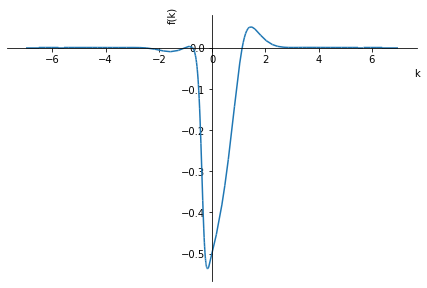

In [151]:
plot((1/(cosh(2*k)) + cos(pi*k)/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-7,7))

In [153]:
Integral((1/(cosh(2*k)) + cos(pi*k)/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-7,7)).evalf(10)+(atan(pi/2)/2).evalf(10)

-4.998582881e-9

In [3]:
Eq(UnevaluatedExpr(Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))),
   atan(pi/2)/2 - UnevaluatedExpr(Integral(( - exp(-2*abs(k))/(cosh(2*k)) +
(sin(pi*k)+exp(-2*abs(k)))/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-oo,oo))))

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), atan(pi/2)/2 - Integral(((sin(pi*k) + exp(-2*Abs(k)))/(sin(pi*k) + cosh(2*k)) - exp(-2*Abs(k))/cosh(2*k))/(4*(k - 1)), (k, -oo, oo)))

In [7]:
Eq(exp(-x),cosh(x)-sinh(x))

Eq(exp(-x), -sinh(x) + cosh(x))

In [158]:
(atan(pi/2)/2).evalf(10) - Integral(( - exp(-2*abs(k))/(cosh(2*k)) +
(sin(pi*k)+exp(-2*abs(k)))/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-7,7)).evalf(10)

0.5973817705

In [458]:
Eq(1/(-I*exp(-2*k)-1),simplify((exp(2*k)+I)/(-I-exp(2*k)))-1/(-1+I*exp(2*k)))

Eq(1/(-1 - I*exp(-2*k)), -1 - 1/(I*exp(2*k) - 1))

## Similar analytic integrand

In [186]:
Integral((1/(-I*exp(2*abs(k))-1)/(k-1)/2+
    1/(-I*exp(I*pi*k)*exp(2*abs(k))+1)/(k-1)/2),(k,-oo,oo))

Integral(1/(2*(k - 1)*(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1)) + 1/(2*(k - 1)*(-I*exp(2*Abs(k)) - 1)), (k, -oo, oo))

In [189]:
(Integral((1/(-I*exp(-2*k)-1)/(k-1)/2 + 1/(-I*exp(I*pi*k)*exp(-2*k)+1)/(k-1)/2),(k,-oo,0)) +
Integral((1/(-I*exp(2*k)-1)/(k-1)/2 + 1/(-I*exp(I*pi*k)*exp(2*k)+1)/(k-1)/2),(k,0,oo)))

Integral(1/(2*(1 - I*exp(-2*k)*exp(I*pi*k))*(k - 1)) + 1/(2*(-1 - I*exp(-2*k))*(k - 1)), (k, -oo, 0)) + Integral(1/(2*(k - 1)*(-I*exp(2*k)*exp(I*pi*k) + 1)) + 1/(2*(k - 1)*(-I*exp(2*k) - 1)), (k, 0, oo))

In [192]:
Integral((exp(2*k)/(-I)/(-I/(-I)-exp(2*k)/(-I))/(k-1)/2 + 
          exp(-I*pi*k)*exp(2*k)/(-I)/(-I/(-I)+exp(-I*pi*k)*exp(2*k)/(-I))/(k-1)/2),(k,-oo,0))

Integral(I*exp(2*k)*exp(-I*pi*k)/(2*(k - 1)*(I*exp(2*k)*exp(-I*pi*k) + 1)) + I*exp(2*k)/(2*(k - 1)*(-I*exp(2*k) + 1)), (k, -oo, 0))

In [204]:
(Integral((exp(2*k)/(-I)/(-I/(-I)-exp(2*k)/(-I))/(k-1)/2 + 
          exp(-I*pi*k)*exp(2*k)/(-I)/(-I/(-I)+exp(-I*pi*k)*exp(2*k)/(-I))/(k-1)/2),(k,-oo,0)).evalf() +
Integral((1/(-I*exp(2*k)-1)/(k-1)/2 + 1/(-I*exp(I*pi*k)*exp(2*k)+1)/(k-1)/2),(k,0,oo)).evalf())

1.48059663038321e+225 + 1.18447730430657e+226*I

In [202]:
Integral(
    ((I*exp(2*k)-1)/(1-I*exp(2*k))/(k-1)/2 + (I*exp(-I*pi*k)*exp(2*k)+1)/(1+I*exp(-I*pi*k)*exp(2*k))/(k-1)/2).simplify() + 
    1/(1-I*exp(2*k))/(k-1)/2 - 1/(1+I*exp(-I*pi*k)*exp(2*k))/(k-1)/2, (k,-oo,0))

Integral(-1/(2*(k - 1)*(I*exp(2*k)*exp(-I*pi*k) + 1)) + 1/(2*(k - 1)*(-I*exp(2*k) + 1)), (k, -oo, 0))

The above is equal to minus the conjugate of the below part over the negative real axis:

If we say the integral we are interested in with abs is:

Integral_abs = Int_minus + Int_plus

Then the integral wihtout abs is:

Integral_no_abs = -Int_minus_conjugate + Int_plus

So:

Integral_abs_real = Int_minus_real + Int_plus_real

Integral_no_abs_real = -Int_minus_real + Int_plus_real

In [8]:
Eq(Integral((1/(-exp(2*k+I*pi*k+I*pi/2)+1)/(k-1)/2-1/(-exp(2*k-I*pi/2)+1)/(k-1)/2),(k,-R,R)),
   -log(1+pi**2/4)/4 -I*atan(pi/2)/2
  )

Eq(Integral(1/(2*(k - 1)*(-I*exp(2*k + I*pi*k) + 1)) - 1/(2*(k - 1)*(I*exp(2*k) + 1)), (k, -R, R)), -log(1 + pi**2/4)/4 - I*atan(pi/2)/2)

In [18]:
Eq(Integral((1/(-exp(2*k+I*pi*k+I*pi/2)+1)/(k-1)/2-1/(-exp(2*k-I*pi/2)+1)/(k-1)/2),(k,-R,R)) + 
   log(1+pi**2/4)/4 + I*atan(pi/2)/2,0)

Eq(Integral(1/(2*(k - 1)*(-I*exp(2*k + I*pi*k) + 1)) - 1/(2*(k - 1)*(I*exp(2*k) + 1)), (k, -R, R)) + log(1 + pi**2/4)/4 + I*atan(pi/2)/2, 0)

In [23]:
Eq(Integral((1/(-exp(2*k+I*pi*k+I*pi/2)+1)/(k-1)/2-1/(-exp(2*k-I*pi/2)+1)/(k-1)/2),(k,-R,R)) + 
   log(1+pi**2/4)/4 + I*atan(pi/2)/2,0).subs(I,-I)

Eq(Integral(1/(2*(k - 1)*(I*exp(2*k - I*pi*k) + 1)) - 1/(2*(k - 1)*(-I*exp(2*k) + 1)), (k, -R, R)) + log(1 + pi**2/4)/4 - I*atan(pi/2)/2, 0)

In [5]:
Integral((1/(-exp(2*k+I*pi*k+I*pi/2)+1)/(k-1)/2-1/(-exp(2*k-I*pi/2)+1)/(k-1)/2),(k,-R,R)).subs(R,7).evalf()

-0.310851334118649 - 0.501942415928863*I

In [7]:
(-log(1+pi**2/4)/4 -I*atan(pi/2)/2).evalf()

-0.310851337722182 - 0.501942410926944*I

In [10]:
result_1

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), (1/2 - I/2)*atan(pi/2) - Integral((1/(-I*exp(I*pi*k)*exp(2*Abs(k)) + 1) + 1/(-I*exp(2*Abs(k)) - 1))/(2*(k - 1)), (k, -oo, oo)))

In [19]:
Eq(UnevaluatedExpr(Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))),
   atan(pi/2)/2 - log(1+pi**2/4)/4 - UnevaluatedExpr(Integral(( - exp(-2*k)/(cosh(2*k)) +
(sin(pi*k)+exp(-2*k))/(cosh(2*k)+sin(pi*k)))/(k-1)/2,(k,0,oo))))

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), -log(1 + pi**2/4)/4 + atan(pi/2)/2 - Integral(((sin(pi*k) + exp(-2*k))/(sin(pi*k) + cosh(2*k)) - exp(-2*k)/cosh(2*k))/(2*(k - 1)), (k, 0, oo)))

In [20]:
(atan(pi/2)/2 - log(1+pi**2/4)/4 - Integral(( - exp(-2*abs(k))/(cosh(2*k)) +
(sin(pi*k)+exp(-2*abs(k)))/(cosh(2*k)+sin(pi*k)))/(k-1)/2,(k,0,10))).evalf()

0.597381809502036

In [26]:
Eq(UnevaluatedExpr(Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))),
   atan(pi/2)/2 - UnevaluatedExpr(Integral(( - exp(-2*abs(k))/(cosh(2*k)) +
(sin(pi*k)+exp(-2*abs(k)))/(cosh(2*k)+sin(pi*k)))/(k-1)/4,(k,-oo,oo))))

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), atan(pi/2)/2 - Integral(((sin(pi*k) + exp(-2*Abs(k)))/(sin(pi*k) + cosh(2*k)) - exp(-2*Abs(k))/cosh(2*k))/(4*(k - 1)), (k, -oo, oo)))

## Final real part over positive real line

In [6]:
Eq(1/(-I*exp(I*pi*k)*exp(2*k)+1),
(sin(pi*k)+exp(-2*k))/(2*cosh(2*k)+2*sin(pi*k)) + I*cos(pi*k)/(2*cosh(2*k)+2*sin(pi*k))
)

Eq(1/(-I*exp(2*k)*exp(I*pi*k) + 1), (sin(pi*k) + exp(-2*k))/(2*sin(pi*k) + 2*cosh(2*k)) + I*cos(pi*k)/(2*sin(pi*k) + 2*cosh(2*k)))

In [7]:
Eq(1/(-I*exp(2*k)-1),I/(2*cosh(2*k)) - exp(-2*k)/(2*cosh(2*k)))

Eq(1/(-I*exp(2*k) - 1), I/(2*cosh(2*k)) - exp(-2*k)/(2*cosh(2*k)))

In [9]:
Eq(UnevaluatedExpr(Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))),
   atan(pi/2)/2 + log(1+pi**2/4)/4 - UnevaluatedExpr(Integral(( - exp(-2*k)/(cosh(2*k)) +
(sin(pi*k)+exp(-2*k))/(cosh(2*k)+sin(pi*k)))/(k-1)/2,(k,0,oo))))

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), log(1 + pi**2/4)/4 + atan(pi/2)/2 - Integral(((sin(pi*k) + exp(-2*k))/(sin(pi*k) + cosh(2*k)) - exp(-2*k)/cosh(2*k))/(2*(k - 1)), (k, 0, oo)))

In [24]:
Eq(UnevaluatedExpr(Integral(1/(1+x**2)*1/(1+tan(x)), (x, 0, pi/2))),
   atan(pi/2)/2 - log(1+pi**2/4)/4 - 
   re(UnevaluatedExpr(Integral((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1),(k,0,oo)))))

Eq(Integral(1/((x**2 + 1)*(tan(x) + 1)), (x, 0, pi/2)), -re(Integral((1/(-I*exp(2*k)*exp(I*pi*k) + 1) + 1/(-I*exp(2*k) - 1))/(k - 1), (k, 0, oo))) - log(1 + pi**2/4)/4 + atan(pi/2)/2)

In [32]:
Eq(-ln(4+pi**2)/2 + atan(pi/2)/2,(-ln(2+I*pi)/4 - I*ln(2+I*pi)/4).factor() + (- ln(2-I*pi)/4 + I*ln(2-I*pi)/4).factor())

Eq(-log(4 + pi**2)/2 + atan(pi/2)/2, (-1/4 - I/4)*log(2 + I*pi) + (-1/4 + I/4)*log(2 - I*pi))

In [6]:
Eq(K*exp(I*alpha)*k*exp(I*theta),N*exp(I*phi)*k*exp(I*theta)).simplify()

Eq(K*k*exp(I*(alpha + theta)), N*k*exp(I*(phi + theta)))

In [8]:
solve(Eq(alpha+theta,-phi-theta),theta)

[-alpha/2 - phi/2]

In [34]:
fff = (1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))
fff

1/(-I*exp(2*k)*exp(I*pi*k) + 1) + 1/(-I*exp(2*k) - 1)

In [36]:
fff = (1/(-I*exp((2+I*pi)*k)+1) + 1/(-I*exp(2*k)-1))
fff

1/(-I*exp(k*(2 + I*pi)) + 1) + 1/(-I*exp(2*k) - 1)

In [16]:
Eq(2+I*pi,sqrt(4+pi**2)*exp(I*atan(pi/2)))

Eq(2 + I*pi, sqrt(4 + pi**2)*exp(I*atan(pi/2)))

In [38]:
fff.subs([(2+I*pi,sqrt(4+pi**2)*exp(I*atan(pi/2))),(k,y*exp(-I*atan(pi/2)/2))])

1/(-I*exp(y*sqrt(4 + pi**2)*exp(I*atan(pi/2)/2)) + 1) + 1/(-I*exp(2*y*exp(-I*atan(pi/2)/2)) - 1)

In [43]:
(1/(-I*exp(sqrt(4+pi**2)*exp(I*atan(pi/2)/2)*y)+1) + 1/(-I*-exp(2*y*exp(-I*atan(pi/2)/2))))

1/(-I*exp(y*sqrt(4 + pi**2)*exp(I*atan(pi/2)/2)) + 1) + 1/(-I*exp(2*y*exp(-I*atan(pi/2)/2)) - 1)

In [ ]:
(1/(-I*exp(sqrt(4+pi**2)*exp(I*atan(pi/2)/2)*y)+1) + 1/(-I*exp(2*y*exp(-I*atan(pi/2)/2))-1))

In [28]:
Eq(re(UnevaluatedExpr(Integral((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1),(k,0,oo)))),
    UnevaluatedExpr(Integral((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1)/2,(k,0,oo))) +
    UnevaluatedExpr(Integral((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1)/2,(k,0,oo))).subs(I,-I)
)

Eq(re(Integral((1/(-I*exp(2*k)*exp(I*pi*k) + 1) + 1/(-I*exp(2*k) - 1))/(k - 1), (k, 0, oo))), Integral((1/(I*exp(2*k)*exp(-I*pi*k) + 1) + 1/(I*exp(2*k) - 1))/(2*(k - 1)), (k, 0, oo)) + Integral((1/(-I*exp(2*k)*exp(I*pi*k) + 1) + 1/(-I*exp(2*k) - 1))/(2*(k - 1)), (k, 0, oo)))

In [31]:
Eq(-I*exp(I*pi*k)*exp(2*k), exp((2+I*pi)*(k-1)+2+I*pi/2))

Eq(-I*exp(2*k)*exp(I*pi*k), I*exp((2 + I*pi)*(k - 1) + 2))

In [34]:
(1/(x-1) - 1/(x+1)).simplify()

2/(x**2 - 1)

In [9]:
F1 = 1/(exp(alpha*z-mu)-1)/(z-delta)
F1

1/((-delta + z)*(exp(alpha*z - mu) - 1))

In [14]:
F1.subs(z, r*exp(I*theta))*exp(I*theta)

exp(I*theta)/((-delta + r*exp(I*theta))*(exp(alpha*r*exp(I*theta) - mu) - 1))

In [20]:
(
    Integral(1/(exp(alpha*r*exp(I*theta)-mu)-1)/(r-delta*exp(-I*theta)),(r,0,R)) + 
    Integral(1/(exp(alpha*r*exp(I*phi)-mu)-1)/(r-delta*exp(-I*phi)),(r,0,R))
)

Integral(1/((-delta*exp(-I*phi) + r)*(exp(alpha*r*exp(I*phi) - mu) - 1)), (r, 0, R)) + Integral(1/((-delta*exp(-I*theta) + r)*(exp(alpha*r*exp(I*theta) - mu) - 1)), (r, 0, R))

In [21]:
Eq(delta*exp(-I*theta),1)

Eq(delta*exp(-I*theta), 1)

In [22]:
Eq(delta*exp(-I*phi),-1)

Eq(delta*exp(-I*phi), -1)

In [25]:
Eq(exp(I*theta),-exp(I*phi))

Eq(exp(I*theta), -exp(I*phi))

In [26]:
Eq(theta, phi + pi)

Eq(theta, phi + pi)

In [34]:
Integral(((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1)).subs(k,k+1),(k,-1,oo))

Integral((1/(-I*exp(I*pi*(k + 1))*exp(2*k + 2) + 1) + 1/(-I*exp(2*k + 2) - 1))/k, (k, -1, oo))

In [37]:
Integral(((1/(I*exp(2*k+I*pi*k+2)+1) - 1/(I*exp(2*k+2)+1))/k),(k,-1,oo))

Integral((1/(I*exp(2*k + I*pi*k + 2) + 1) - 1/(I*exp(2*k + 2) + 1))/k, (k, -1, oo))

In [39]:
diff(1/(I*exp(2*k+I*s*k+2)+1),s)

k*exp(I*k*s + 2*k + 2)/(I*exp(I*k*s + 2*k + 2) + 1)**2

In [40]:
diff(1/(I*exp(2*k+I*s*k+2)+1),k)

-I*(I*s + 2)*exp(I*k*s + 2*k + 2)/(I*exp(I*k*s + 2*k + 2) + 1)**2

In [42]:
Derivative(1/x,x)

Derivative(1/x, x)

In [48]:
Integral(Integral(Derivative(1/(I*exp(2*k+I*s*k+2)+1),s),(s,0,pi))/k,(k,-1,oo))

Integral(Integral(Derivative(1/(I*exp(I*k*s + 2*k + 2) + 1), s), (s, 0, pi))/k, (k, -1, oo))

In [69]:
Eq(Derivative(1/(I*exp(2*k+I*s*k+2)+1),s)/k, Derivative(1/(I*exp(2*k+I*s*k+2)+1),k)/(s-I*2))

Eq(Derivative(1/(I*exp(I*k*s + 2*k + 2) + 1), s)/k, Derivative(1/(I*exp(I*k*s + 2*k + 2) + 1), k)/(s - 2*I))

In [70]:
Eq(
    Integral(Integral(Derivative(1/(I*exp(2*k+I*s*k+2)+1),s),(s,0,pi))/k,(k,-1,oo)),
   Integral(Integral(Derivative(1/(I*exp(2*k+I*s*k+2)+1),k)/(s-I*2),(s,0,pi)),(k,-1,oo))
)

Eq(Integral(Integral(Derivative(1/(I*exp(I*k*s + 2*k + 2) + 1), s), (s, 0, pi))/k, (k, -1, oo)), Integral(Derivative(1/(I*exp(I*k*s + 2*k + 2) + 1), k)/(s - 2*I), (s, 0, pi), (k, -1, oo)))

In [71]:
Eq(
   Integral(Integral(Derivative(1/(I*exp(2*k+I*s*k+2)+1),k)/(s-I*2),(s,0,pi)),(k,-1,oo)),
   Integral((1/(I*exp(2*k+I*s*k+2)+1)/(s-I*2)).subs(k,-1),(s,0,pi))
)

Eq(Integral(Derivative(1/(I*exp(I*k*s + 2*k + 2) + 1), k)/(s - 2*I), (s, 0, pi), (k, -1, oo)), Integral(1/((1 + I*exp(-I*s))*(s - 2*I)), (s, 0, pi)))

In [74]:
Integral((1/(I*exp(2*k+I*s*k+2)+1)/(s-I*2)).subs(k,-1),(s,0,pi)).doit()

Integral(exp(I*s)/((s - 2*I)*(exp(I*s) + I)), (s, 0, pi))

In [61]:
Integral((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1),(k,0,300)).evalf()

-0.406290736247041 - 0.547580801720079*I

In [73]:
Integral((1/(I*exp(-I*s)+1)/(s-I*2)),(s,0,pi)).evalf()

0.406290736247041 + 0.547580801720079*I

In [63]:
Integral(((1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1)).subs(k,k+1),(k,-1,300)).evalf()

-0.406290736247041 - 0.547580801720079*I

## Binet

In [5]:
Eq(digamma(z),ln(z) - 1/2/z - 2*Integral(t/(t**2 + z**2)*1/(exp(2*pi*t)-1),(t,0,oo)))

Eq(polygamma(0, z), log(z) - 2*Integral(t/((t**2 + z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)) - 0.5/z)

In [4]:
binet1 = ln(z) - 1/2/z - 2*Integral(t/(t**2 + z**2)*1/(exp(2*pi*t)-1),(t,0,oo))

In [82]:
binet1.subs(z,1+I*pi).evalf().doit()

1.1532635570076 + 1.41164139210767*I

In [84]:
digamma(z).subs(z,1+I*pi).evalf().doit()

1.1532635570076 + 1.41164139210767*I

In [86]:
Eq((1/(t+I*z) + 1/(t-I*z)).simplify(),(1/(t+I*z) + 1/(t-I*z)))

Eq(2*t/(t**2 + z**2), 1/(t + I*z) + 1/(t - I*z))

In [88]:
1/(exp(2*pi*t)-1)/(t+I*z)

1/((t + I*z)*(exp(2*pi*t) - 1))

In [10]:
((1/(exp(2*pi*t+I*z)-1)).subs(z,pi) - (1/(exp(2*pi*t+I*z)-1)).subs(z,0))

-1/(exp(2*pi*t) - 1) + 1/(-exp(2*pi*t) - 1)

In [110]:
diff(1/(exp(2*pi*t+z)-1),z)

-exp(2*pi*t + z)/(exp(2*pi*t + z) - 1)**2

In [99]:
diff(1/(exp(2*pi*t+I*z*t*pi)+1),t)

-(I*pi*z + 2*pi)*exp(I*pi*t*z + 2*pi*t)/(exp(I*pi*t*z + 2*pi*t) + 1)**2

In [14]:
Eq(1/(exp(2*pi*t)+1)-1/(exp(2*pi*t)-1),(1/(exp(2*pi*t)+1)-1/(exp(2*pi*t)-1)).simplify())

Eq(1/(exp(2*pi*t) + 1) - 1/(exp(2*pi*t) - 1), 2/(1 - exp(4*pi*t)))

In [16]:
Eq(1/(exp(2*pi*t)+1),1/(exp(2*pi*t)-1)-2/(exp(4*pi*t)-1))

Eq(1/(exp(2*pi*t) + 1), -2/(exp(4*pi*t) - 1) + 1/(exp(2*pi*t) - 1))

In [17]:
((1/(exp(2*pi*t+I*z)-1)).subs(z,pi) - (1/(exp(2*pi*t+I*z)-1)).subs(z,0))

-1/(exp(2*pi*t) - 1) + 1/(-exp(2*pi*t) - 1)

In [27]:
Eq(Integral(Derivative(1/(exp(2*pi*t+I*z)-1),z),(z,0,pi)),
   Integral(Derivative(1/(exp(2*pi*t+I*z)-1),z),(z,0,pi)).doit()
  ).subs(1/(exp(2*pi*t)+1),1/(exp(2*pi*t)-1)-2/(exp(4*pi*t)-1)).subs(1/(1-exp(2*pi*t)),-1/(exp(2*pi*t)-1))

Eq(Integral(Derivative(1/(exp(2*pi*t + I*z) - 1), z), (z, 0, pi)), 2/(exp(4*pi*t) - 1) - 2/(exp(2*pi*t) - 1))

In [30]:
Eq(digamma(z)-ln(z) + 1/2/z, - 2*Integral(t/(t**2 + z**2)*1/(exp(2*pi*t)-1),(t,0,oo)))

Eq(-log(z) + polygamma(0, z) + 0.5/z, -2*Integral(t/((t**2 + z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)))

In [32]:
Eq(digamma(z)-ln(z) + 1/2/z, - 2*Integral(t/(t**2 + z**2)*1/(exp(2*pi*t)-1),(t,0,oo)))

Eq(-log(z) + polygamma(0, z) + 0.5/z, -2*Integral(t/((t**2 + z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)))

In [34]:
Eq(Integral(t/(t**2 + z**2)*1/(exp(4*pi*t)-1),(t,0,oo)), 
   Integral((t/(t**2 + z**2)*1/(exp(4*pi*t)-1)).subs(t,t/2)*2,(t,0,oo)))

Eq(Integral(t/((t**2 + z**2)*(exp(4*pi*t) - 1)), (t, 0, oo)), Integral(t/((t**2/4 + z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)))

In [35]:
Eq(Integral(t/(t**2 + z**2)*1/(exp(4*pi*t)-1),(t,0,oo)), 
   Integral((t/(t**2 + z**2*4)*1/(exp(2*pi*t)-1)),(t,0,oo)))

Eq(Integral(t/((t**2 + z**2)*(exp(4*pi*t) - 1)), (t, 0, oo)), Integral(t/((t**2 + 4*z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)))

In [36]:
Eq(digamma(z)-ln(z) + 1/2/z, - 2*Integral(t/(t**2 + z**2)*1/(exp(2*pi*t)-1),(t,0,oo))).subs(z,2*z)

Eq(-log(2*z) + polygamma(0, 2*z) + 0.25/z, -2*Integral(t/((t**2 + 4*z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)))

In [38]:
diff(1/(exp(2*pi*t+I*z)-1),t)

-2*pi*exp(2*pi*t + I*z)/(exp(2*pi*t + I*z) - 1)**2

In [43]:
diff(1/(exp(2*pi*(t+I*z)*(s-1))-1),s)/(t+I*z)

-2*pi*exp(2*pi*(s - 1)*(t + I*z))/(exp(2*pi*(s - 1)*(t + I*z)) - 1)**2

In [42]:
diff(1/(exp(2*t*(s-1))-1),s)/(t+I*z)

-2*t*exp(2*t*(s - 1))/((t + I*z)*(exp(2*t*(s - 1)) - 1)**2)

In [44]:
Eq(Integral(Derivative(1/(exp(2*pi*t+I*z)-1),z),(z,0,pi)),
   Integral(Derivative(1/(exp(2*pi*t+I*z)-1),z),(z,0,pi)).doit()
  ).subs(1/(exp(2*pi*t)+1),1/(exp(2*pi*t)-1)-2/(exp(4*pi*t)-1)).subs(1/(1-exp(2*pi*t)),-1/(exp(2*pi*t)-1))

Eq(Integral(Derivative(1/(exp(2*pi*t + I*z) - 1), z), (z, 0, pi)), 2/(exp(4*pi*t) - 1) - 2/(exp(2*pi*t) - 1))

In [46]:
Integral(Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1),s),(s,0,pi))

Integral(Derivative(1/(exp(-s*(t + I*z) + 2*pi*t) - 1), s), (s, 0, pi))

In [48]:
Integral(Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1),s),(s,0,pi))

Integral(Derivative(1/(exp(-s*(t + I*z) + 2*pi*t) - 1), s), (s, 0, pi))

In [49]:
(1/(exp(2*pi*t-(t+I*z)*s)-1)).subs(s,pi) - (1/(exp(2*pi*t-(t+I*z)*s)-1)).subs(s,0)

1/(exp(2*pi*t - pi*(t + I*z)) - 1) - 1/(exp(2*pi*t) - 1)

polygamma(0, 2*pi)

In [73]:
Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1),s).doit()/(t+I*z)

-exp(s*(t + I*z) + 2*pi*t)/(exp(s*(t + I*z) + 2*pi*t) - 1)**2

In [72]:
Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1),t).doit()/(s+2*pi)

-exp(s*(t + I*z) + 2*pi*t)/(exp(s*(t + I*z) + 2*pi*t) - 1)**2

In [76]:
Eq(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t))

Eq(Derivative(1/((t + I*z)*(exp(s*(t + I*z) + 2*pi*t) - 1)), s), Derivative(1/((s + 2*pi)*(exp(s*(t + I*z) + 2*pi*t) - 1)), t))

In [89]:
Eq(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t)).doit()

True

In [91]:
Eq(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t)).subs(z,-z).doit()

True

In [92]:
Eq(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t)).subs(z,-z)

Eq(Derivative(1/((t - I*z)*(exp(s*(t - I*z) + 2*pi*t) - 1)), s), Derivative(1/((s + 2*pi)*(exp(s*(t - I*z) + 2*pi*t) - 1)), t))

In [228]:
Eq(Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1)/(s-2*pi),t))

Eq(Derivative(1/((t + I*z)*(exp(-s*(t + I*z) + 2*pi*t) - 1)), s), Derivative(1/((s - 2*pi)*(exp(-s*(t + I*z) + 2*pi*t) - 1)), t))

In [229]:
Eq(Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1)/(s-2*pi),t)).subs(z,-z)

Eq(Derivative(1/((t - I*z)*(exp(-s*(t - I*z) + 2*pi*t) - 1)), s), Derivative(1/((s - 2*pi)*(exp(-s*(t - I*z) + 2*pi*t) - 1)), t))

In [226]:
Eq(Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1)/(t+I*z),s),Derivative(1/(exp(2*pi*t-(t+I*z)*s)-1)/(s-2*pi),t)).subs(z,-z).doit().simplify()

True

In [80]:
Eq(Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(t+I*z),s),(s,0,oo)),
            Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,oo)))

Eq(Integral(Derivative(1/((t + I*z)*(exp(s*(t + I*z) + 2*pi*t) - 1)), s), (s, 0, oo)), Integral(Derivative(1/((s + 2*pi)*(exp(s*(t + I*z) + 2*pi*t) - 1)), t), (s, 0, oo)))

In [81]:
Eq(-1/(exp(2*pi*t)-1)/(t+I*z),
            Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,oo)))

Eq(-1/((t + I*z)*(exp(2*pi*t) - 1)), Integral(Derivative(1/((s + 2*pi)*(exp(s*(t + I*z) + 2*pi*t) - 1)), t), (s, 0, oo)))

In [3]:
Eq(-1/(exp(2*pi*t)-1)/(t+I*z),
            Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,oo))).subs(z,-z)

Eq(-1/((t - I*z)*(exp(2*pi*t) - 1)), Integral(Derivative(1/((s + 2*pi)*(exp(s*(t - I*z) + 2*pi*t) - 1)), t), (s, 0, oo)))

In [35]:
(-1/(exp(2*pi*t)-1)/(t+I*z)).subs([(z,1),(t,1)]).evalf()

-0.000935468299330322 + 0.000935468299330322*I

In [36]:
(Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,oo))).subs([(z,1),(t,1)]).doit().evalf()

-0.000935468299330322 + 0.000935468299330322*I

In [83]:
(1/(t+I*z)+1/(t-I*z)).simplify()

2*t/(t**2 + z**2)

In [77]:
Eq((1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)).subs(t,T) - (1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)).subs(t,0),
    Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(t,0,T))
  )

Eq(1/((s + 2*pi)*(exp(2*pi*T + s*(T + I*z)) - 1)) - 1/((s + 2*pi)*(exp(I*s*z) - 1)), Integral(Derivative(1/((s + 2*pi)*(exp(s*(t + I*z) + 2*pi*t) - 1)), t), (t, 0, T)))

In [131]:
((1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)).subs(t,T) - (1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)).subs(t,0)
).subs([(z,I+2),(T,1),(s,100)]).evalf()

0.0094173688320517 + 1.53721384439122e-5*I

In [135]:
((1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,T) - (1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,0)
).subs([(z,I+2),(T,1),(s,100)]).evalf()

-1.70523226262826e-46 + 3.05667569700722e-46*I

In [132]:
(Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t).doit(),(t,0,T))
).subs([(z,I+2),(T,1),(s,100)]).evalf()

0.0094173688320517 + 1.53721384439122e-5*I

In [134]:
(Integral(Derivative(1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t).doit(),(t,0,T))
).subs([(z,I+2),(T,1),(s,100)]).evalf()

-1.7042851599345e-46 + 3.05497798939868e-46*I

In [37]:
Eq(-2*t/(exp(2*pi*t)-1)/(t**2+z**2),
            Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t),(s,0,oo)))

Eq(-2*t/((t**2 + z**2)*(exp(2*pi*t) - 1)), Integral(Derivative(1/((s + 2*pi)*(exp(s*(t + I*z) + 2*pi*t) - 1)) + 1/((s + 2*pi)*(exp(s*(t - I*z) + 2*pi*t) - 1)), t), (s, 0, oo)))

In [129]:
(-2*t/(exp(2*pi*t)-1)/(t**2+z**2)).subs([(z,I+2),(t,0.03)]).evalf()

-0.0347131306647327 + 0.0462702931317041*I

In [130]:
(Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t).doit(),(s,0,10000))
).subs([(z,I+2),(t,0.03)]).evalf()

0.161607377744666 + 0.451054846553146*I

In [147]:
Eq(-Integral(2*t/(exp(2*pi*t)-1)/(t**2+z**2),(t,epsilon,T)),
Integral((1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,T) - 
         (1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,epsilon),(s,0,oo))
  )

Eq(-Integral(2*t/((t**2 + z**2)*(exp(2*pi*t) - 1)), (t, epsilon, T)), Integral(-1/((s + 2*pi)*(exp(2*pi*epsilon + s*(epsilon + I*z)) - 1)) - 1/((s + 2*pi)*(exp(2*pi*epsilon + s*(epsilon - I*z)) - 1)) + 1/((s + 2*pi)*(exp(2*pi*T + s*(T + I*z)) - 1)) + 1/((s + 2*pi)*(exp(2*pi*T + s*(T - I*z)) - 1)), (s, 0, oo)))

In [ ]:
Eq(-Integral(2*t/(exp(2*pi*t)-1)/(t**2+z**2),(t,epsilon,T)),
Integral((1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,T) - 
         (1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,epsilon),(s,0,oo))
  )

In [152]:
Eq(-Integral(2*t/(exp(2*pi*t)-1)/(t**2+z**2),(t,epsilon,oo)),
Integral( 
         -(1/(exp(((2*pi+s)*t+I*z*s))-1)/(s+2*pi)+1/(exp((2*pi+s)*t-I*z*s)-1)/(s+2*pi)).subs(t,epsilon),(s,0,oo))
  )

Eq(-Integral(2*t/((t**2 + z**2)*(exp(2*pi*t) - 1)), (t, epsilon, oo)), Integral(-1/((s + 2*pi)*(exp(epsilon*(s + 2*pi) + I*s*z) - 1)) - 1/((s + 2*pi)*(exp(epsilon*(s + 2*pi) - I*s*z) - 1)), (s, 0, oo)))

In [173]:
((-(1/(exp(((2*pi+s)*t+I*z*s))-1)/(s+2*pi)+1/(exp((2*pi+s)*t-I*z*s)-1)/(s+2*pi)).subs(t,epsilon)).subs(epsilon,0).simplify() +
diff(-(1/(exp(((2*pi+s)*t+I*z*s))-1)/(s+2*pi)+1/(exp((2*pi+s)*t-I*z*s)-1)/(s+2*pi)).subs(t,epsilon),epsilon).subs(epsilon,0).simplify()*epsilon)

-epsilon/(2*sin(s*z/2)**2) + 1/(s + 2*pi)

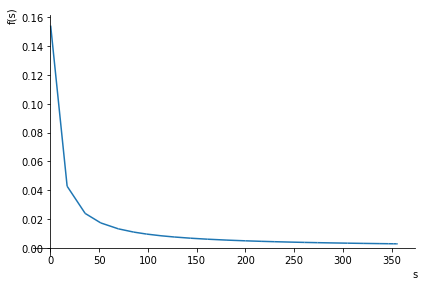

In [213]:
plot(re((
((-(1/(exp(((2*pi+s)*t+I*z*s))-1)/(s+2*pi)+1/(exp((2*pi+s)*t-I*z*s)-1)/(s+2*pi)).subs(t,epsilon)).subs(epsilon,0).simplify() +
diff(-(1/(exp(((2*pi+s)*t+I*z*s))-1)/(s+2*pi)+1/(exp((2*pi+s)*t-I*z*s)-1)/(s+2*pi)).subs(t,epsilon),epsilon).subs(epsilon,0).simplify()*epsilon)
).subs(t,epsilon)).subs([(z,I+2),(epsilon,0.000001)]),(s,0.2,1000))

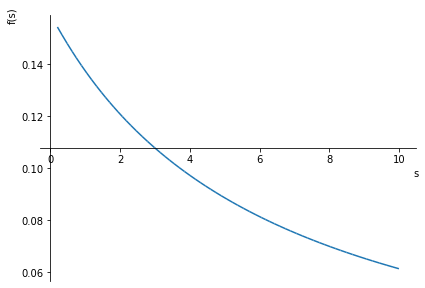

In [202]:
plot(re(( -(1/(exp(((2*pi+s)*t+I*z*s))-1)/(s+2*pi)+1/(exp((2*pi+s)*t-I*z*s)-1)/(s+2*pi)).subs(t,epsilon)).subs([(z,I+2),(epsilon,0.00001)])),(s,0.2,10))

In [166]:
(-Integral(2*t/(exp(2*pi*t)-1)/(t**2+z**2),(t,epsilon,oo))).subs([(z,2),(epsilon,0.2)]).evalf()

-0.00879194083185666

In [167]:
(Integral(
         -(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,epsilon),(s,0,20000))
).subs([(z,2),(epsilon,0.2)]).evalf()

-0.00879194083185666 + 6.54684950911748e-98*I

In [140]:
(Integral((1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,T) - 
         (1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,0.02),(s,0,20000))
).subs([(z,2),(T,200)]).evalf()

-0.018 + 6.4e-111*I

In [145]:
(-Integral(2*t/(exp(2*pi*t)-1)/(t**2+z**2),(t,0,oo))).subs([(z,2)]).evalf()

-0.0203628454614782

In [143]:
(Integral(
    -(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi)).subs(t,0.02),(s,0,20000))
).subs([(z,2)]).evalf()

-0.018 + 6.4e-111*I

In [144]:
limit(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi)+1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t,0)

-1/(s + 2*pi)

In [11]:
Eq(-2*t/(t**2+z**2)/(exp(2*pi*t)-1),
    Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,oo)) +
    Integral(Derivative(1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t),(s,0,oo))
)

Eq(-2*t/((t**2 + z**2)*(exp(2*pi*t) - 1)), Integral(Derivative(1/((s + 2*pi)*(exp(s*(t - I*z) + 2*pi*t) - 1)), t), (s, 0, oo)) + Integral(Derivative(1/((s + 2*pi)*(exp(s*(t + I*z) + 2*pi*t) - 1)), t), (s, 0, oo)))

In [87]:
Eq(Integral(-2*t/(t**2+z**2)/(exp(2*pi*t)-1),(t,0,oo)),
    Integral(-1/(exp(I*z*s)-1)/(s+2*pi),(s,0,oo)) +
    Integral(-1/(exp(-I*z*s)-1)/(s+2*pi),(s,0,oo))
)

Eq(Integral(-2*t/((t**2 + z**2)*(exp(2*pi*t) - 1)), (t, 0, oo)), Integral(-1/((-1 + exp(-I*s*z))*(s + 2*pi)), (s, 0, oo)) + Integral(-1/((s + 2*pi)*(exp(I*s*z) - 1)), (s, 0, oo)))

In [88]:
(-1/(exp(I*z*s)-1)-1/(exp(-I*z*s)-1)).simplify()

1

In [96]:
Eq(-2*t/(t**2+z**2)/(exp(2*pi*t)-1),
    Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,1000)) +
    Integral(Derivative(1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t),(s,0,1000))
).subs([(z,1+I*pi), (t,0.3)]).doit().evalf()

KeyboardInterrupt: 

In [97]:
(-2*t/(t**2+z**2)/(exp(2*pi*t)-1))

0.00809042601813356 + 0.00578996997628422*I

In [99]:
(Integral(Derivative(1/(exp(2*pi*t+(t+I*z)*s)-1)/(s+2*pi),t),(s,0,100)) +
    Integral(Derivative(1/(exp(2*pi*t+(t-I*z)*s)-1)/(s+2*pi),t),(s,0,100))
).subs([(z,1+I*pi), (t,0.3)]).doit().evalf()


0.321225701379069 + 0.115987071930834*I

## Equivalent infinite integral

In [315]:
(1/(-I*exp(I*pi*k)*exp(2*k)+1) + 1/(-I*exp(2*k)-1))/(k-1)

(1/(-I*exp(2*k)*exp(I*pi*k) + 1) + 1/(-I*exp(2*k) - 1))/(k - 1)

In [242]:
(1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1)

1/((k - 1)*(-I*exp(alpha*s + beta*k*s + delta*k) + 1))

In [243]:
((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1)).subs(s,0)

1/((k - 1)*(-I*exp(delta*k) + 1))

In [255]:
Eq(Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1),s), 
   Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1),s).doit())

Eq(Derivative(1/((k - 1)*(-I*exp(alpha*s + beta*k*s + delta*k) + 1)), s), I*(alpha + beta*k)*exp(alpha*s + beta*k*s + delta*k)/((k - 1)*(-I*exp(alpha*s + beta*k*s + delta*k) + 1)**2))

In [265]:
Eq(Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(beta*s+delta),k), 
   Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(beta*s+delta),k).doit()).subs(beta,-alpha)

Eq(Derivative(1/((-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)*(-alpha*s + delta)), k), I*exp(-alpha*k*s + alpha*s + delta*k)/(-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)**2)

In [264]:
Eq(-Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1)/alpha,s), 
   -Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1)/alpha,s).doit()).subs(beta,-alpha)

Eq(-Derivative(1/(alpha*(k - 1)*(-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)), s), -I*(-alpha*k + alpha)*exp(-alpha*k*s + alpha*s + delta*k)/(alpha*(k - 1)*(-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)**2))

In [266]:
Eq(Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(-alpha*s+delta),k), 
   -Derivative((1/(-I*exp(alpha*s+beta*s*k+delta*k)+1))/(k-1)/alpha,s))

Eq(Derivative(1/((-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)*(-alpha*s + delta)), k), -Derivative(1/(alpha*(k - 1)*(-I*exp(alpha*s + beta*k*s + delta*k) + 1)), s))

In [273]:
Eq(Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(alpha*s-delta),k), 
   Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(k-1)/alpha,s))

Eq(Derivative(1/((-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)*(alpha*s - delta)), k), Derivative(1/(alpha*(k - 1)*(-I*exp(-alpha*k*s + alpha*s + delta*k) + 1)), s))

In [274]:
Eq(Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(alpha*s-delta),k), 
   Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(k-1)/alpha,s)).doit().simplify()

True

In [276]:
Eq(Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(alpha*s-delta),k), 
   Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(k-1)/alpha,s)).subs(alpha,1)

Eq(Derivative(1/((-delta + s)*(-I*exp(delta*k - k*s + s) + 1)), k), Derivative(1/((k - 1)*(-I*exp(delta*k - k*s + s) + 1)), s))

In [316]:
Eq(Derivative((1/(I*exp(alpha*s-alpha*s*k+delta*k)+1))/(alpha*s-delta),k), 
   Derivative((1/(I*exp(alpha*s-alpha*s*k+delta*k)+1))/(k-1)/alpha,s)).subs(alpha,1)

Eq(Derivative(1/((-delta + s)*(I*exp(delta*k - k*s + s) + 1)), k), Derivative(1/((k - 1)*(I*exp(delta*k - k*s + s) + 1)), s))

In [319]:
Eq(Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(alpha*s-delta),k), 
   Derivative((1/(-I*exp(alpha*s-alpha*s*k+delta*k)+1))/(k-1)/alpha,s)).subs(alpha,1).subs(delta,2+I*pi)

Eq(Derivative(1/((-I*exp(-k*s + k*(2 + I*pi) + s) + 1)*(s - 2 - I*pi)), k), Derivative(1/((k - 1)*(-I*exp(-k*s + k*(2 + I*pi) + s) + 1)), s))

In [320]:
Eq(Derivative((1/(I*exp(alpha*s-alpha*s*k+delta*k)+1))/(alpha*s-delta),k), 
   Derivative((1/(I*exp(alpha*s-alpha*s*k+delta*k)+1))/(k-1)/alpha,s)).subs(alpha,1).subs(delta,2)

Eq(Derivative(1/((s - 2)*(I*exp(-k*s + 2*k + s) + 1)), k), Derivative(1/((k - 1)*(I*exp(-k*s + 2*k + s) + 1)), s))

In [326]:
Eq(
Derivative((1/(-I*exp(s-s*k+(2+I*pi)*k)+1))/(s-(2+I*pi))-(1/(I*exp(s-s*k+2*k)+1))/(s-2),k),
Derivative((1/(-I*exp(s-s*k+(2+I*pi)*k)+1))/(k-1)-(1/(I*exp(s-s*k+2*k)+1))/(k-1),s)
)

Eq(Derivative(1/((-I*exp(-k*s + k*(2 + I*pi) + s) + 1)*(s - 2 - I*pi)) - 1/((s - 2)*(I*exp(-k*s + 2*k + s) + 1)), k), Derivative(1/((k - 1)*(-I*exp(-k*s + k*(2 + I*pi) + s) + 1)) - 1/((k - 1)*(I*exp(-k*s + 2*k + s) + 1)), s))

In [328]:
Eq(
Derivative((1/(-I*exp(s-s*k+(2+I*pi)*k)+1))/(s-(2+I*pi))-(1/(I*exp(s-s*k+2*k)+1))/(s-2),k),
Derivative((1/(-I*exp(s-s*k+(2+I*pi)*k)+1))/(k-1)-(1/(I*exp(s-s*k+2*k)+1))/(k-1),s)
).doit().simplify()

True

In [321]:
Eq(
    Integral(Integral(
        Derivative((1/(-I*exp(s-s*k+(2+I*pi)*k)+1))/(s-(2+I*pi))-(1/(I*exp(s-s*k+2*k)+1))/(s-2),k)
    ,(k,0,oo)),(s,0,oo)), 
   Integral(Integral(
        Derivative((1/(-I*exp(s-s*k+(2+I*pi)*k)+1))/(k-1)-(1/(I*exp(s-s*k+2*k)+1))/(k-1),s)
    ,(s,0,oo)),(k,0,oo))
)

Eq(Integral(Derivative(1/((-I*exp(-k*s + k*(2 + I*pi) + s) + 1)*(s - 2 - I*pi)) - 1/((s - 2)*(I*exp(-k*s + 2*k + s) + 1)), k), (k, 0, oo), (s, 0, oo)), Integral(Derivative(1/((k - 1)*(-I*exp(-k*s + k*(2 + I*pi) + s) + 1)) - 1/((k - 1)*(I*exp(-k*s + 2*k + s) + 1)), s), (s, 0, oo), (k, 0, oo)))

In [333]:
Eq(
    Integral((1/(s-I*pi) - 1/s) - (1/(-I*exp(s)+1))/(s-(2+I*pi))+(1/(I*exp(s)+1))/(s-2),(s,0,oo)), 
   Integral(-(1/(-I*exp((2+I*pi)*k)+1))/(k-1)+(1/(I*exp(2*k)+1))/(k-1),(k,0,oo))
)

Eq(Integral(-1/((-I*exp(s) + 1)*(s - 2 - I*pi)) + 1/(s - I*pi) + 1/((s - 2)*(I*exp(s) + 1)) - 1/s, (s, 0, oo)), Integral(-1/((k - 1)*(-I*exp(k*(2 + I*pi)) + 1)) + 1/((k - 1)*(I*exp(2*k) + 1)), (k, 0, oo)))

In [343]:
Integral((1/(s-I*pi) - 1/s) - (1/(-I*exp(s)+1))/(s-(2+I*pi))+(1/(I*exp(s)+1))/(s-2),(s,0.0001,3)).evalf()

-0.e+0 + 0.e+0*I

In [338]:
Integral(-(1/(-I*exp((2+I*pi)*k)+1))/(k-1)+(1/(I*exp(2*k)+1))/(k-1),(k,0.0001,100)).evalf()

0.406290736245994 + 0.547480804574095*I

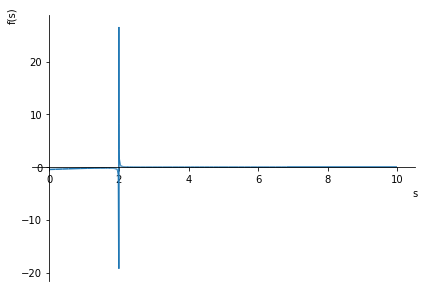

In [344]:
plot(re((1/(-I*exp(s)+1))/(s-(2+I*pi))+(1/(I*exp(s)+1))/(s-2)),(s,0,10))

In [287]:
Eq(
    Integral(Integral(
        Derivative((1/(-I*exp(s-s*k+delta*k)+1))/(s-delta),k).subs(delta,mu) - 
        Derivative((1/(-I*exp(s-s*k+delta*k)+1))/(s-delta),k).subs(delta,nu)
    ,(k,0,oo)),(s,0,oo)), 
   Integral(
        (1/(-I*exp(s-s*k+delta*k)+1)/(k-1)).subs([(delta,mu),(s,0)]) - 
        (1/(-I*exp(s-s*k+delta*k)+1)/(k-1)).subs([(delta,nu),(s,0)])
    ,(k,0,oo))
).subs([(mu,2+I*pi),(nu,2)])

Eq(Integral(-Derivative(1/((s - 2)*(-I*exp(-k*s + 2*k + s) + 1)), k) + Derivative(1/((-I*exp(-k*s + k*(2 + I*pi) + s) + 1)*(s - 2 - I*pi)), k), (k, 0, oo), (s, 0, oo)), Integral(1/((k - 1)*(-I*exp(k*(2 + I*pi)) + 1)) - 1/((k - 1)*(-I*exp(2*k) + 1)), (k, 0, oo)))

In [299]:
Eq(
    (Integral((
        (1/(-I*exp(s-s*k+delta*k)+1)/(s-delta)).subs(delta,mu) - 
        (1/(-I*exp(s-s*k+delta*k)+1)/(s-delta)).subs(delta,nu)
    ).subs([(mu,2+I*pi),(nu,2),(k,0)]),(s,0,oo))
    ), 
   Integral(
        (1/(-I*exp(s-s*k+delta*k)+1)/(k-1)).subs([(delta,mu),(s,0)]).subs([(mu,2+I*pi),(nu,2)]) - 
        (1/(-I*exp(s-s*k+delta*k)+1)/(k-1)).subs([(delta,nu),(s,0)]).subs([(mu,2+I*pi),(nu,2)])
    ,(k,0,oo))
)

KeyboardInterrupt: 

In [314]:
Integral((1/(s-mu) - 1/(s-nu)).subs([(mu,2+I*pi),(nu,2)]),(s,2+epsilon,oo)).doit().expand().subs(epsilon,0.00000000001).evalf()

-26.4731659087839 + 1.57079632679171*I

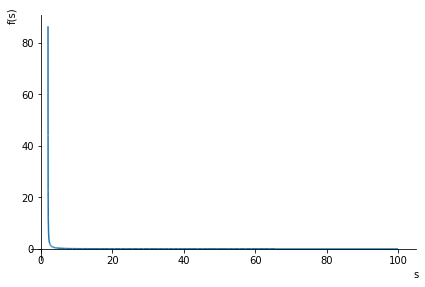

In [305]:
plot(abs((1/(s-mu) - 1/(s-nu)).subs([(mu,2+I*pi),(nu,2)])),(s,2,100))